In [718]:
from __future__ import division
import numpy as np
import sys
import math
from scipy import special as sp
import matplotlib.pyplot as plt
#Universal Constants
c = 3e8
G = 6.67e-11
Msolar = 2e30
AU = 1.49e11 #meters

In [833]:
#Define derivative functions


def adot(y,constants):
    
    e = y[0]
    a = y[2]
    
    mu1 = constants[4]
    M = constants[5]
    
    da_GW = -64/5 * G**3*mu1*M**2/(c**5 * a**3) * (1-e**2)**(-7/2) * (1 + 73*e**2 / 24 + 37*e**4 / 96)


    return da_GW

    

def edot(y,constants):
    e = y[0]
    gamma = y[1]
    a = y[2]
    
    K = constants[0]
    J1 = constants[1]
    I = constants[3]
    mu1 = constants[4]
    M = constants[5]
    
    de_Kozai = 5*K*e*(1-e**2)*a**2*(1-np.cos(I)**2)*np.sin(2*gamma)/J1 
    de_GW = -304/15 * G**3*mu1*M**2/(c**5*a**4) * e/(1-e**2)**(5/2) * (1+121*e**2/304)

    return de_Kozai + de_GW


def gdot(y,constants):
    
    e = y[0]
    gamma = y[1]
    a = y[2]
    
    K = constants[0]
    J1 = constants[1]
    J2 = constants[2]
    I = constants[3]
    mu1 = constants[4]
    M = constants[5]
    
    
    dg_part1 = 2*(1-e**2) - 5*(1-e**2 - np.cos(I)**2)*np.sin(gamma)**2
    dg_part2 = (1 - e**2 + 5*e**2 * np.cos(gamma)**2)*np.cos(I)
    dg_PN=3/(c**2*a*(1-e**2)) * (G*M/a)**(3/2)
    dg_KL = 2*K*a**2*(dg_part1/J1 + dg_part2/J2)
    
    
    return dg_KL + dg_PN    



def get_psi(a,gamma,da,dg,a0,g0,t):
    
    part1 = -2*a0**2*np.cos(2*gamma)*dg**2
    part2 = 2*a0*da*dg*(-2*t*np.cos(2*gamma)*dg + np.sin(2*gamma))
    part3 = da**2 * (np.cos(2*gamma) - 2*t**2*np.cos(2*gamma)*dg**2 + 2*t*dg*np.sin(2*gamma))
    
    return (part1 + part2+part3)/(4*dg**3)
    #return (part1)/(4*dg**3)
    


In [987]:
#Define all functions
def plot_e(data):
    fig = plt.figure(figsize=(10,10))
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    
    t = data[:,0] / (365*24*3600)
    e = data[:,1]
    
    
    print (t[-1], t[-2])
    
    ax1.plot(t,e)
    
    fs = 25
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    
    
    ax1.tick_params(axis='both', which='major', labelsize=fs)
    
    ax1.set_ylabel('$e$', fontsize = fs)
    ax1.set_xlabel('t [years]',fontsize=fs)
    
    #ax1.set_xlim(0,0.1)
    #ax1.set_ylim()
    
    
    plt.savefig('../../Manuscript/figures/e_example.png', dpi=300)
    
    
def plot_g(data):
    fig = plt.figure(figsize=(10,10))
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    
    t = data[:,0] / (365*24*3600)
    g = data[:,2]
    
    ax1.plot(t,g)
    
    fs = 25
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    
    
    ax1.tick_params(axis='both', which='major', labelsize=fs)
    
    ax1.set_ylabel(r'$\gamma$', fontsize = fs)
    ax1.set_xlabel('t [years]',fontsize=fs)
    
    
    plt.savefig('../../Manuscript/figures/g_example.png', dpi=300)



def plot_compare_ecc(data1,data2):
    
    fig = plt.figure(figsize=(14,10))
    ax1 = plt.subplot2grid((1,1), (0,0))

    
    
    t = data1[:,0] / (365*24*3600)
    e1 = data1[:,1]
    e2 = data2[:,1]
    


    
    ax1.plot(t,e1)
    ax1.plot(t,e2)
    

    
    fs = 25
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    



    ax1.tick_params(axis='both', which='major', labelsize=fs)



    ax1.set_xlabel('t [years]',fontsize=fs)
    ax1.set_ylabel('$e$', fontsize = fs)


    de = 0.5-0.49975
    
    #ax1.set_xlim(0,0.1)
    #ax1.set_ylim(0.49975,0.5+de )
    

    

def plot_compare(data1,data2):
    
    fig = plt.figure(figsize=(14,10))
    ax1 = plt.subplot2grid((3,1), (0,0))
    ax2 = plt.subplot2grid((3,1), (1,0), sharex=ax1)
    ax3 = plt.subplot2grid((3,1), (2,0),sharex=ax1)
    
    
    t = data1[:,0] / (365*24*3600)
    e1 = data1[:,1]
    e2 = data2[:,1]
    
    
    print (max(e1), max(e2))
    print (min(e1), min(e2))
    
    g1 = data1[:,2]
    g2 = data2[:,2]
    
    a1 = data1[:,3] / AU
    a2 = data1[:,3] / AU
    

    
    ax1.plot(t,e1)
    ax1.plot(t,e2)
    
    ax2.plot(t,g1)
    ax2.plot(t,g2)
    
    ax3.plot(t,a1)
    ax3.plot(t,a2)
    
    fs = 25
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)


    ax1.tick_params(axis='both', which='major', labelsize=fs)
    ax2.tick_params(axis='both', which='major', labelsize=fs)
    ax3.tick_params(axis='both', which='major', labelsize=fs)


    ax3.set_xlabel('t [years]',fontsize=fs)



    ax1.set_ylabel('$e$', fontsize = fs)
    ax2.set_ylabel(r'$\gamma$', fontsize = fs)
    ax3.set_ylabel(r'$a$ [AU]', fontsize = fs)
    
    
    SSres = np.sum((e1 - e2)**2)
    SStot = np.sum((e1 - np.average(e1))**2)
    
    R2 = 1 - SSres/SStot
    
    
    ax1.set_xlim(-0.01,0.1)
    
    
    plt.subplots_adjust(hspace=-0.01)


    print (R2)
    
    # Save just the portion _inside_ the second axis's boundaries
  #  extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

    # Pad the saved area by 10% in the x-direction and 20% in the y-direction
   # fig.savefig('/Users/tomkimpson/PhD/PI/PI Work/Manuscript/figures/just_e.png', bbox_inches=extent.expanded(1.1, 1.2))
    

    

    
    
    
    



def plotit(data):
    
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.subplot2grid((3,1), (0,0)) 
    ax2 = plt.subplot2grid((3,1), (1,0)) 
    ax3 = plt.subplot2grid((3,1), (2,0)) 
    
    t = data[:,0] / (365*24*3600)
    e = data[:,1]
    g = data[:,2]
    a = data[:,3]

    
    fs = 25
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)


    ax1.tick_params(axis='both', which='major', labelsize=fs)
    ax2.tick_params(axis='both', which='major', labelsize=fs)
    ax3.tick_params(axis='both', which='major', labelsize=fs)


    ax.set_xlabel('t [years]',fontsize=fs)
    ax2.set_xlabel('t [years]',fontsize=fs)


    ax1.set_ylabel('$e$', fontsize = fs)
    ax2.set_ylabel(r'$\gamma$', fontsize = fs)
    ax3.set_ylabel(r'$a$', fontsize = fs)
    

    

    
    ax1.plot(t,e)
    ax2.plot(t,g)
    ax3.plot(t,a)
    
    
    #Save the subplots 
    



def sma(M,f):
    #Total mass, orbital frequency
    return (G*M/(2*np.pi*f)**2)**(1/3)

def ang_mom(m1,m2,a):
    M = m1+m2
    return m1*m2 * np.sqrt(G*a/M)


def setup(m0,m1,m2,f1,e1,e2):
    
    #Masses
    M = m0+m1
    mu1 = (m0*m1)/(m0+m1)

    #Inner Binary calcs
    eps1 = 1-e1**2
    a1 = sma(m0+m1,f1)#semi major axis via K3
    J1 = ang_mom(m0,m1,a1)
    
    #Outer Binary
    eps2 = 1-e2**2
    a2 = beta*a1
    J2 = ang_mom(m0+m1,m2,a2)


    
    #Other
    Kprime = 3*G*m0*m1*m2 / (8*(m0+m1) * a2**3*(1-e2**2)**(3/2))
    

    
    
    return Kprime,J1,J2,mu1,M,a1




def derivs(y,constants):

    e_dot = edot(y,constants)
    gamma_dot = gdot(y,constants)
    a_dot = adot(y,constants)


    return np.array((e_dot, gamma_dot,a_dot))





def RungeKutta(yn,constants,Tint,Tres):
    
    #Setup timing precision
    trange= np.linspace(0,Tint,Tres)
    h = trange[1] - trange[0]
    t = 0
    nsteps = int(Tint/h)
    
    #Define output array
    out = np.zeros((nsteps,4)) #t,e,gamma,a
    counter = 0
    out[counter,0] = t
    out[counter,1] = yn[0]
    out[counter,2] = yn[1] 
    out[counter,3] = yn[2] 
    counter = counter + 1

    orig = derivs(yn,constants)
    dg0 = orig[1]
    da0 = orig[2]
    
    print ('IN:', yn)
    #print ('dIN', orig)
    while t < Tint:
        
    

        
        k1 = h * derivs(yn,constants)
        k2 = h * derivs(yn+k1/2,constants)
        k3 = h * derivs(yn+k2/2,constants)
        k4 = h * derivs(yn+k3,constants)

        
        ynew = yn + (k1 + 2*k2 + 2*k3 + k4)/6
        
    
        yn = ynew
        
   
    
        t = t + h
        
        if counter < nsteps:
            out[counter,0] = t
            out[counter,1] = yn[0]
            out[counter,2] = yn[1]  
            out[counter,3] = yn[2] 
        
        
            counter = counter + 1
    
    

    final = derivs(yn,constants)
    dg1 = final[1]
    da1 = final[2]
    
    print ('OUT:', yn)
    print ('dg:', dg1, dg0)
    print ('da:', da1, da0)
    
    
    return out



def numerical_soln(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,Tres):
    
    #Calculate some constants and useful values
    K,J1,J2,mu1,M,a1 = setup(m0,m1,m2,f1,e1,e2)
    
    #Set up for runge Kutta
    yn = np.array((e1,gamma,a1))

    constants = np.array((K,J1,J2,I,mu1,M))
    
    #Check weak-coupling condition
    print ('Condition 1:', m2/M * (1/beta)**3)
    print ('Condition 2:', mu1/M * (1/beta)**2)

    
    T_seconds = Tint*365*24*3600
    
    output = RungeKutta(yn,constants,T_seconds,Tres)
    
    return output
    
    
def analytical_soln(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,Tres,gamma_numerical):
    
    #Calculate some constants and useful values
    K,J1,J2,mu1,M,a1 = setup(m0,m1,m2,f1,e1,e2)
    
    
    #Define time variable
    
    #------Cumbersome way to get the same time points as in the numerical case
    T_seconds = Tint*365*24*3600
    trange= np.linspace(0,T_seconds,Tres)
    h = trange[1] - trange[0]
    t=0
    nsteps = int(T_seconds/h)
    
    out = np.zeros((nsteps,4))
                   
    counter = 0
    out[counter,0] = t
    counter = counter +1
                               
                   
    
    while t < T_seconds:
        
        t = t + h
        if counter < nsteps:
            out[counter,0] = t
            counter = counter + 1
    #------Cumbersome way to get the same time points as in the numerical case
    

    t = out[:,0]
    y = np.array((e1,gamma,a1))
    constants = np.array((K,J1,J2,I,mu1,M))
    
    #Get approx a
    da = adot(y,constants)
    approx_a = da*t + a1
    

    #Get approx gamma
    dg_part1 = 2*(1-e1**2) - 5*(1-e1**2 - np.cos(I)**2)*np.sin(gamma)**2
    dg_part2 = (1 - e1**2 + 5*e1**2 * np.cos(gamma)**2)*np.cos(I)
    
    dg_PN=3/(c**2*approx_a*(1-e1**2)) * (G*M/approx_a)**(3/2)
    dg_KL = 2*K*approx_a**2*(dg_part1/J1 + dg_part2/J2)
    
    dg = dg_PN + dg_KL
    print ('analytical dg', dg[-1], dg[0])
    


    dg = gdot(y,constants) #ORIGINAL
    approx_gamma = t*dg + gamma
    #approx_gamma = gamma_numerical
  
    

    
    
    sumA = np.sum(approx_a**(-4)*h)
    print ('SUM A = ', sumA)

    
    
    #Approx e
    ge = e1*(1-e1**2)**(-5/2) * (1 + 121*e1**2/304)
    he = ge/(e1*(1-e1**2))
    psi = get_psi(approx_a,approx_gamma,da,dg,a1,gamma,t)
    AA = 5*K*(1-np.cos(I)**2)/J1
    Cprime = -64*G**3 * mu1 * M**2 / (5 * c**5)

    CC = np.log(e1) - 0.5*np.log(1-e1**2)
    alpha_KL = AA*psi + CC
    alpha_GW = -19/36 * Cprime*he/da * (approx_a**(-3) - a1**(-3))
    
    
    print ('AA = ', AA)
    print ('Cprime = ', Cprime/a1**(4))
    
    alpha = alpha_KL + alpha_GW
    #print ('AFTER:', AA*psi)
    
    #psi0 = get_psi(approx_a,approx_gamma,da,dg,a1,gamma,0)
    
    
    #D = np.log(e1) - 0.5*np.log(1-e1**2) - AA *psi0 + 19/36 * Cprime*he *(da*a1**3)**(-1)
    
    #alpha = AA*psi - 19/36 * Cprime*he * (da*approx_a**3)**(-1) + D
    
        
    #fe = (1-e1**2)**(-7/2) * (1 + 73*e1**2 /24 + 37*e1**4 / 96)
    #print ('fe = ', fe)
    
    #print ('AFTER:',- 19/36 * Cprime*he * (da*approx_a**3)**(-1) )
    
    #extra = 5*e1*(474+121*e1**2) / (304 * (1-e1**2)**(9/2))
    
    approx_e = np.exp(alpha)/np.sqrt(1+np.exp(2*alpha)) #+ 19/36 * Cprime *(da*approx_a**3)**-1 *e1 * extra
    
    #approx_e = approx_e - (approx_e[0] - e1)
    
    omega = 12/19 * AA/Cprime * a1**6 *np.sin(2*gamma)
    #e2 = (-12/19 * AA/Cprime * a1**6 * np.sin(2*gamma) - 1)*304/1185
    #print ('e2:', np.sqrt(e2))
    print ('omega',omega)
    
    

        
    #Check weak-coupling condition
    print ('Condition 1:', m2/M * (1/beta)**3)
    print ('Condition 2:', mu1/M * (1/beta)**2)

        
    
    #output
    out[:,0] = t
    out[:,1] = approx_e
    out[:,2] = approx_gamma
    out[:,3] = approx_a

    
    return out



    

In [995]:
#Set up initial system parameters
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
e1 = 0.5 #eccentricity
beta=100
m2 = 10*Msolar
e2 =0.6
I = 60 * np.pi/180.0 #Inclination
gamma = np.pi/4


Tint = 5 #years
Tres = int(4e4) #Effective timing resolution. Bigger numbers = better

output = numerical_soln(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,Tres)
gamma_numerical = output[:,2]
output_analytical = analytical_soln(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,Tres,gamma_numerical)

Condition 1: 1.6666666666666668e-07
Condition 2: 2.5e-05
IN: [5.00000000e-01 7.85398163e-01 5.87465609e+08]
OUT: [4.98327729e-01 6.03410340e+02 5.84896997e+08]
dg: 3.83935046303523e-06 3.805015458536068e-06
da: -0.016305515585493344 -0.016267506889648106
analytical dg 3.846862665665192e-06 3.805015458536068e-06
SUM A =  1.3355198119688491e-27
AA =  4.536484260048664e-27
Cprime =  -5.6693745996179e-12
omega -174.41217394528965
Condition 1: 1.6666666666666668e-07
Condition 2: 2.5e-05


enum: 0.5 0.5000750752835131 0.4983208097857008


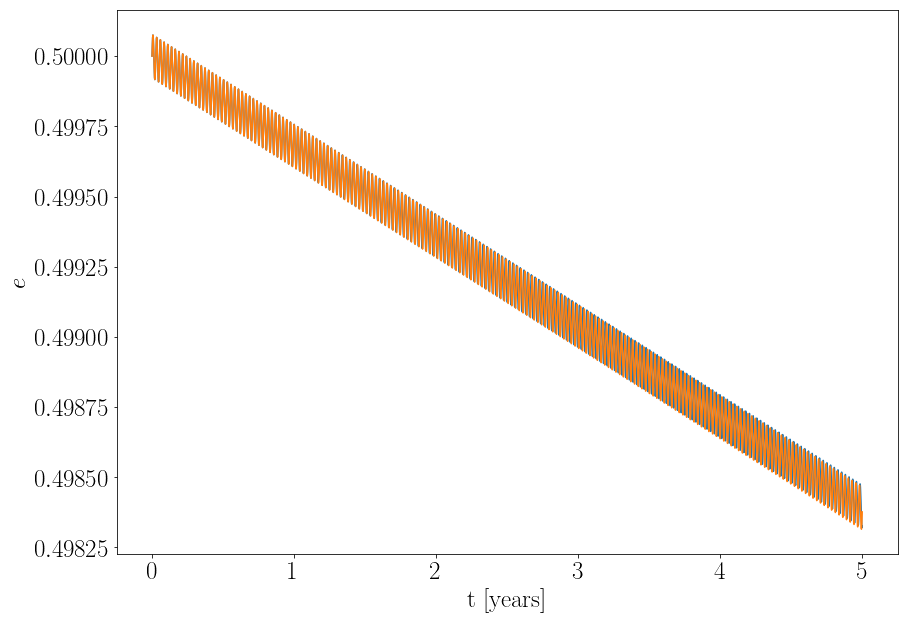

In [996]:
%matplotlib inline


#Plot the output



#plot_e(output_analytical)
#plot_e(output)

enum = output[:,1]

print ('enum:',enum[0], max(enum), min(enum))
plot_compare_ecc(output,output_analytical)
#plt.savefig('/Users/tomkimpson/PhD/PI/PI Work/Manuscript/figures/test.png', dpi=300)

#print (output)
#plot_compare_ecc(output,output_analytical)
#plt.savefig('/Users/tomkimpson/PhD/PI/PI Work/Manuscript/figures/just_e1000.png', dpi=300)

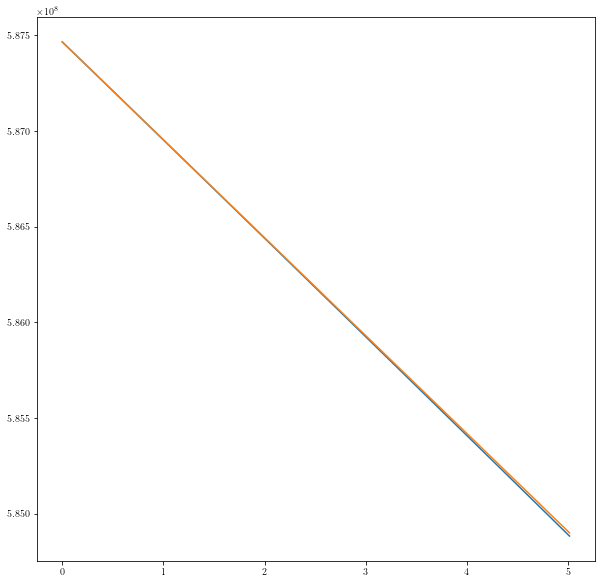

In [819]:
%matplotlib inline
    
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,1), (0,0))




a1 = 587465609.3038191

Cprime = -6.752505469155555e+23
fe = 4.884311999533223




tf = 5*365*24*3600
t = np.linspace(0,tf,100)


before = (4*Cprime*fe*t + a1**4)**(1/4)
after = Cprime*fe*a1**(-3)*t + a1


plot_t = t / (364*24*3600)

ax1.plot(plot_t,before)
ax1.plot(plot_t,after)





No handles with labels found to put in legend.


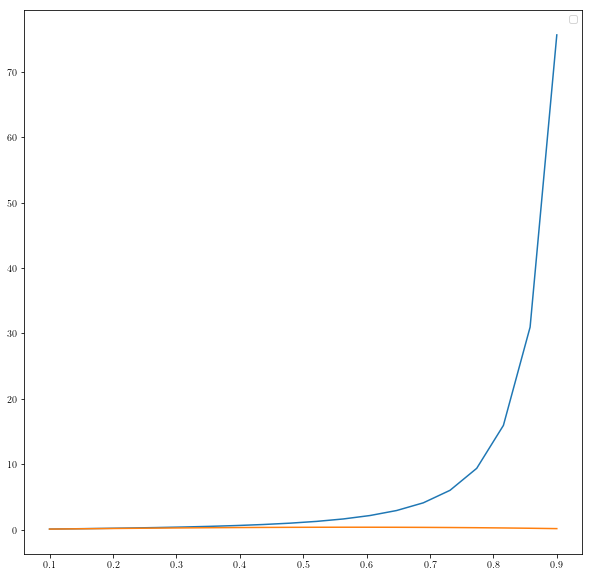

In [977]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,1), (0,0))
e = np.linspace(0.1,0.9,20)

fe = (1-e**2)**(-7/2) * (1 + 73*e**2/24 + 37*e**4/96)
ge = e*(1-e**2)**(-5/2) * (1 + 121*e**2/304)
he = ge/ (e * (1-e**2))

LHS = (1+73/24 * e**2 + 37/96*e**4) * (1-e**2)**(-7/2)
RHS = (1 + 121/304 * e**2)*(1-e**2)**(-7/2)

#ax1.plot(e,he,label = 'LHS')


#LHS = e*(1-e**2)/fe
#RHS = ge / fe

#ax1.plot(e,ge, label='ge')

series = e + 881/304 *e**3 + 3265/608 *e**5 + 20195/2432 *e**7  + 56595/4864 *e**9+ 596211/38912*e**11 

series = e + (881*e**3)/304 + (3265 *e**5)/608 + (20195*e**7)/2432 + (56595 *e**9)/4864 + (596211* e**11)/38912 + (1504503* e**13)/77824 + (7359495* e**15)/311296 + (8788065 *e**17)/311296 




#ax1.plot(e,series, label ='s')

#ax1.plot(e,(1-e**2)**-(7/2), label='LHS')
#ax1.plot(e,1 + 121*e**2 / 304, label='RHS')

#series = 2.66667 - 1.77778(e-0.5) + 11.8519*(e-0.5)

#ax1.plot(e,1/e + e + e**3 + e**5)
#ax1.plot(e,(e*(1-e**2))**-1)

u = np.log(e) - 0.5*np.log(1-0.5**2)
ax1.plot(e,ge)
ax1.plot(e,e*(1-e**2))

#func = e*(1-e**2) / ge

#ax1.plot(e,func)
#print (max(func), min(func))

#full = 1+121*e**2/304 * (1-e**2)**(-7/2)
#series = 1 + 1185*e**2/304 + 5635*e**4/608 + 42735*e**2/2432 + 142065*e**8/4864

#ax1.plot(e,full)
#ax1.plot(e,series)

#a = 0.00394 * AU
#bit = 3/(c**2*a*(1-e**2)) * (G * (m0+m1)/a)**(3/2)
#ax1.plot(e,bit)

ax1.legend()


In [407]:
(6.67e-11)**3 / (3e8)**5

1.2211562263374486e-73